In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#We then load the data, which we have downloaded from the Kaggle website
train = pd.read_csv(os.path.join('data', '/home/rhythm/Desktop/git/RandomForest/titanic/train.csv'))
test = pd.read_csv(os.path.join('data', '/home/rhythm/Desktop/git/RandomForest/titanic/test.csv'))

In [3]:
#summery of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#So we can see that 62% of the people in the training set died. This is slightly less than the estimated 67% that 
#died in the actual shipwreck
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

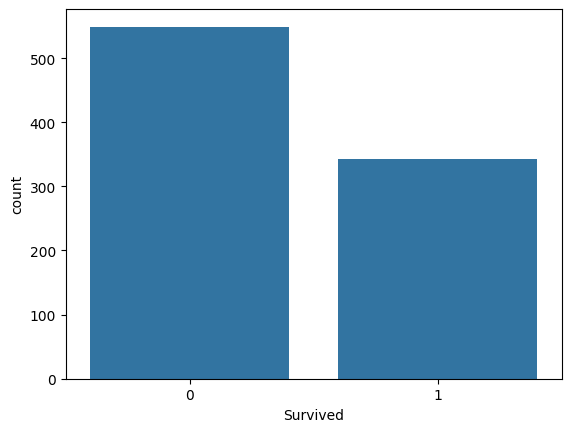

In [6]:
sns.countplot(x='Survived', data=train)

In [7]:
#Class played a critical role in survival, as the survival rate decreased drastically for the lowest class. 
#This variable is both useful and clean, and I will be treating it as a categorical variable.

train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

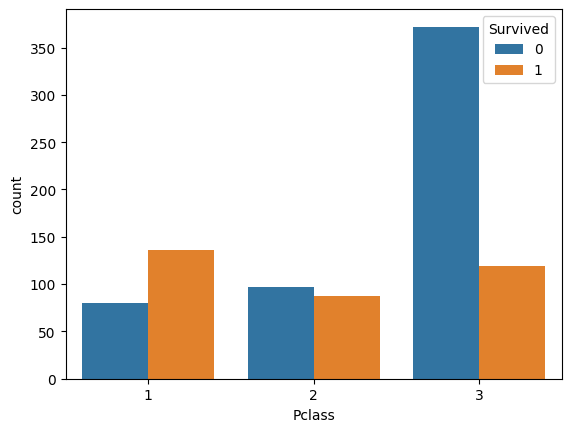

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=train)

In [9]:
#The Name column as provided cannot be used in the model. However, we might be able to extract some meaningful information from it.

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])# create 'Name_Title'
# column, first it splits each name by coma(,) select the second element of the list, then it splits the result by 
#space and selects the first part: x.split()[0]. This effectively extracts the title (e.g., "Mr.", "Mrs.", "Dr.", etc.).
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Title, dtype: int64

In [11]:
train['Survived'].groupby(train['Name_Title']).mean() #groups the 'Survived' column by unique values in the 'Name_Title' column
#it shows name_tile with survival rates of each title.

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [12]:
#Additionally, looking at the relationship between the length of a name and survival rate appears to indicate that 
#there is indeed a clear relationship. What might this mean? Are people with longer names more important, and thus 
#more likely to be prioritized in a shipwreck?

train['Name_Len'] = train['Name'].apply(lambda x: len(x)) 
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean() #qcut is used to bin the 'Name_Len' column into 5
#quantiles.  This groups the 'Survived' data by the bins created by qcut.

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [13]:
pd.qcut(train['Name_Len'],5).value_counts() # it counts the number of entries in each quantile. 

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

In [14]:
#"Women and children first," goes the famous saying. Thus, we should expect females to have a higher survival rate 
#than males, and indeed that is the case. We expect this variable to be very useful in our model.

train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [15]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [16]:
#There are 177 nulls for Age, and they have a 10% lower survival rate than the non-nulls. Before imputing values 
#for the nulls, we will include an Age_null flag just to make sure we can account for this characteristic of the data.

train['Survived'].groupby(train['Age'].isnull()).mean() #calculating the mean survival rate based on whether the 'Age' 
#column in the 'train' DataFrame is null or not.

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [17]:
#Upon first glance, the relationship between age and survival appears to be a murky one at best. However, this 
#doesn't mean that the variable will be a bad predictor; at deeper levels of a given decision tree, a more
#discriminant relationship might open up.

train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [18]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [19]:
#Upon first glance, I'm not too convinced of the importance of this variable. The distribution and survival rate 
#between the different categories does not give me much hope.

train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [20]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
#Same conclusions as Sibsp: passengers with zero parents or children had a lower likelihood of survival than other
#wise, but that survival rate was only slightly less than the overall population survival rate.

train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [22]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [24]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [25]:
train.groupby(['Ticket_Len'])['Survived'].mean() # is calculating the mean survival rate for different groups of 
#passengers based on the length of their 'Ticket' values. 

Ticket_Len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

In [26]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [27]:
#piece of information is the first letter of each ticket, which, again, might be indicative of a certain attribute
#of the ticketholders or their rooms.

train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])# converts each ticket number to a string extracts
#the first character of the ticket number.

In [28]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [29]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [30]:
#There is a clear relationship between Fare and Survived, and I'm guessing that this relationship is similar to that of Class and Survived.

pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [31]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [32]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])#is using the Pandas library to create a 
#cross-tabulation (contingency table) that shows the distribution of passengers across different fare ranges 
#(quantiles) and their passenger classes ('Pclass').

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [33]:
#We can see that most of the cabin letters are associated with a high survival rate, so this might very well be a 
#useful variable. Because there aren't that many unique values, we won't do any grouping here, even if some of the values have a small count.

train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [34]:
train['Cabin_Letter'].value_counts()


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [35]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [36]:
#Upon first glance, this appears to be useless. Not only do we have ~700 nulls which will be difficult to impute, but the correlation with Survived is almost zero. However, the cabin numbers as a whole do seem to have a high surival rate compared to the population average, so we might want to keep this just in case for now.

train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [37]:
pd.qcut(train['Cabin_num'],3).value_counts()

(1.999, 28.667]     67
(65.667, 148.0]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [38]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [39]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789371

In [40]:
#Looks like the Cherbourg people had a 20% higher survival rate than the other embarking locations. 
#This is very likely due to the high presence of upper-class passengers from that location.

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [42]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

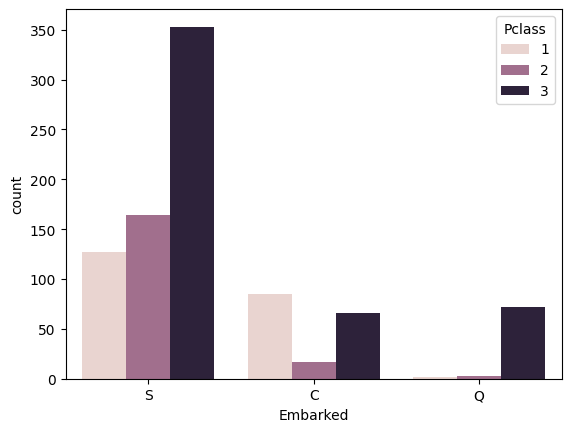

In [43]:
sns.countplot(x='Embarked', hue='Pclass', data=train)

In [44]:
#We will perform our feature engineering through a series of helper functions that each serve a specific purpose.
#This first function creates two separate columns: a numeric column indicating the length of a passenger's Name 
#field, and a categorical column that extracts the passenger's title.

def names(train, test):
    for i in [train, test]:
        
        i['Name_Len'] = i['Name'].apply(lambda x: len(x)) #create new column, applies a function to each value in the 'Name' column, 
        #calculates the length of each name and assigns this value to the corresponding row in the Name_Len column.
        
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0]) #create new 
        #column 'Name_title',first takes each name, splits it by a comma (,), and takes the second part of the split
        # result of the previous operation and splits it again, this time by spaces, and takes the first part of the split. 
        del i['Name']
        
    return train, test

In [45]:
# Next, we impute the null values of the Age column by filling in the mean value of the passenger's corresponding 
#title and class. This more granular approach to imputation should be more accurate than merely taking the mean age of the population.

def age_impute(train, test):
    for i in [train, test]:
        
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)#missing 'age' value to 1 otherwise 0
        
    train['mean'] = train.groupby(['Name_Title', 'Pclass'])['Age'].transform('mean')#It creates a new column 
    #'mean' in the train dataset, where each row contains the mean age corresponding to its 'Name_Title' and 'Pclass'.
    # transform use for calculates the mean of the 'Age' column for each group 
    
    train['Age'] = train['Age'].fillna(train['mean'])#It fills missing values in the 'Age' column of the train 
    #dataset with the corresponding mean age from the 'mean' column.
    
    z = test.merge(train, on=['Name_Title', 'Pclass'], how='left').drop_duplicates(['PassengerId_x'])#merges the 
    #test dataframe with the train dataframe. The merge is done based on the columns Name_Title and Pclass.The 
    #how='left' argument means that all rows from the test dataframe should be included in the result, even if 
    #there is no match in the train dataframe. if no match then add NaN value, duplicate value removed.
    
    test['Age'] = np.where(test['Age'].isnull(), z['mean'], test['Age']) #  it takes the corresponding 'mean' value
    #from the z 
    
    test['Age'] = test['Age'].fillna(test['Age'].mean())
    
    del train['mean']
    
    return train, test

In [46]:
#We combine the SibSp and Parch columns into a new variable that indicates family size, and group the family size variable into three categories.

def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        #(i['SibSp'] + i['Parch']) gives the total number of family members aboard for each passenger.
        #The family size is then categorized into three groups: 'Solo', 'Nuclear', and 'Big'.
        #np.where is a function that works like an if-else statement. It checks a condition and returns the first 
        #value if the condition is true, otherwise, it returns the second value.
        
        
        del i['SibSp']
        del i['Parch']
    return train, test

In [47]:
#The Ticket column is used to create Ticket_Len, which indicates the length of the Ticket field.

def ticket_grouped(train, test):
    
    for i in [train, test]:
        
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        
        del i['Ticket']
    return train, test

In [48]:
#The following two functions extract the first letter of the Cabin column and its number, respectively.

def cabin(train, test):
    
    for i in [train, test]:
        
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        
        del i['Cabin']
    return train, test

In [49]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [50]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        #[-1]: Selects the last substring from the list of substrings.
        #[1:]: From the selected substring, it takes all characters starting from the second character to the end.
        
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)#np.NaN: The value you want to replace 'an' with, which is NaN
        
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
        
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)#This 
    #concatenates the original train DataFrame with the new DataFrame created by pd.get_dummies(...).
    
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [51]:
#We fill the null values in the Embarked column with the most commonly occuring value, which is 'S.'

def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [52]:
#We also fill in the one missing value of Fare in our test set with the mean value of Fare from the training set (transformations of test set data must always be fit using training data).

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [53]:
#Next, because we are using scikit-learn, we must convert our categorical columns into dummy variables. The following function does this, and then it drops the original categorical columns. It also makes sure that each category is present in both the training and test datasets.

def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        
        test[column] = test[column].apply(lambda x: str(x))
        
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        
        del train[column]
        del test[column]
    return train, test

In [54]:
# #Our last helper function drops any columns that haven't already been dropped. In our case, we only need to drop 
# #the PassengerId column, which we have decided is not useful for our problem. Note that dropping the PassengerId 
# #column here means that we'll have to load it later when creating our submission file.

# def drop(train, test, bye = ['PassengerId']):
#     for i in [train, test]:
#         for z in bye:
#             del i[z]
#     return train, test

In [55]:
#Having built our helper functions, we can now execute them in order to build our dataset that will be used in the
#model:

train = pd.read_csv(os.path.join('data', '/home/rhythm/Desktop/git/RandomForest/titanic/train.csv'))
test = pd.read_csv(os.path.join('data', '/home/rhythm/Desktop/git/RandomForest/titanic/test.csv'))
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 
                                              'Cabin_Letter', 'Name_Title', 'Fam_Size'])
# train, test = drop(train, test)

In [56]:
#We can see that our final dataset has 45 columns, composed of our target column and 44 predictor variables. 
#Although highly dimensional datasets can result in high variance, I think we should be fine here.

len(train.columns)

37

In [57]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Cabin_Letter_n', 'Cabin_Letter_C', 'Cabin_Letter_E',
       'Cabin_Letter_G', 'Cabin_Letter_D', 'Cabin_Letter_A', 'Cabin_Letter_B',
       'Cabin_Letter_F', 'Name_Title_Mr.', 'Name_Title_Mrs.',
       'Name_Title_Miss.', 'Name_Title_Master.', 'Name_Title_Rev.',
       'Name_Title_Dr.', 'Name_Title_Ms.', 'Name_Title_Col.',
       'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')
Index(['PassengerId', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
 

In [69]:
#Hyperparameter Tuning
#We will use grid search to identify the optimal parameters of our random forest model. Because our training 
#dataset is quite small, we can get away with testing a wider range of hyperparameter values. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf = RandomForestClassifier(max_features='sqrt',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

# Define the parameter grid for GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 4, 10, 12, 16],
    "n_estimators": [50, 100, 400, 700, 1000]
}

# Create a GridSearchCV instance
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

X_train = train.drop(['Survived'], axis=1)  # Assuming 'Survived' is your target and 'PassengerId' is not a feature
y_train = train['Survived']

# Fitting the GridSearchCV
gs = gs.fit(X_train, y_train)
# gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 1])


In [70]:
X_train.columns


Index(['PassengerId', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Cabin_Letter_n', 'Cabin_Letter_C', 'Cabin_Letter_E',
       'Cabin_Letter_G', 'Cabin_Letter_D', 'Cabin_Letter_A', 'Cabin_Letter_B',
       'Cabin_Letter_F', 'Name_Title_Mr.', 'Name_Title_Mrs.',
       'Name_Title_Miss.', 'Name_Title_Master.', 'Name_Title_Rev.',
       'Name_Title_Dr.', 'Name_Title_Ms.', 'Name_Title_Col.',
       'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [71]:
#Looking at the results of the grid search, we can see that our optimal parameter settings are not at the endpoints 
#of our provided values, meaning that we do not have to test more values. What else can we say about our optimal 
#values? The min_samples_split parameter is at 10, which should help mitigate overfitting to a certain degree. 
#This is especially good because we have a relatively large number of estimators (700), which could potentially increase our generalization error.

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.8395061728395062
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [72]:
#Model Estimation and Evaluation
#We are now ready to fit our model using the optimal hyperparameters. The out-of-bag score can give us an unbiased 
#estimate of the model accuracy, and we can see that the score is 82.15%, which is a little higher than our final 
#leaderboard score, indicating that there is some overfitting. This is to be expected due to the fact that our datasets are so small.

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='entropy', 
                             n_estimators=50,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_model.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf_model.oob_score_)

0.0000


In [73]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Cabin_Letter_n', 'Cabin_Letter_C', 'Cabin_Letter_E',
       'Cabin_Letter_G', 'Cabin_Letter_D', 'Cabin_Letter_A', 'Cabin_Letter_B',
       'Cabin_Letter_F', 'Name_Title_Mr.', 'Name_Title_Mrs.',
       'Name_Title_Miss.', 'Name_Title_Master.', 'Name_Title_Rev.',
       'Name_Title_Dr.', 'Name_Title_Ms.', 'Name_Title_Col.',
       'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')
Index(['PassengerId', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
 

In [74]:
#Let's take a brief look at our variable importance according to our random forest model. We can see that some of 
#the original columns we predicted would be important in fact were, including gender, fare, and age. But we also 
#see title, name length, and ticket length feature prominently, so we can pat ourselves on the back for creating such useful variables.


pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf_model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
3,Name_Len,0.167787
2,Fare,0.163809
1,Age,0.133110
8,Ticket_Len,0.050914
25,Name_Title_Mr.,0.049829
9,Pclass_3,0.049337
0,Survived,0.044895
34,Fam_Size_Solo,0.043973
14,Embarked_S,0.043423
33,Fam_Size_Nuclear,0.037407


In [75]:
#Our last step is to predict the target variable for our test data and generate an ouuput.

np.shape(test)

(418, 36)

In [76]:
train.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Cabin_Letter_n', 'Cabin_Letter_C', 'Cabin_Letter_E',
       'Cabin_Letter_G', 'Cabin_Letter_D', 'Cabin_Letter_A', 'Cabin_Letter_B',
       'Cabin_Letter_F', 'Name_Title_Mr.', 'Name_Title_Mrs.',
       'Name_Title_Miss.', 'Name_Title_Master.', 'Name_Title_Rev.',
       'Name_Title_Dr.', 'Name_Title_Ms.', 'Name_Title_Col.',
       'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [78]:
X_test = test.drop(['PassengerId'], axis=1) 
# Predict using the best estimator
best_rf_model = gs.best_estimator_
predictions = best_rf_model.predict(test)


submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('/home/rhythm/Desktop/git/RandomForest/titanic/submission.csv', index=False)

In [80]:

pred = pd.read_csv(os.path.join('data','/home/rhythm/Desktop/git/RandomForest/titanic/submission.csv'))

In [81]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
